# Primer dataset - MNIST

### Descargando el dataset MNIST

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=10000)

len(X_train), len(X_test), len(y_train), len(y_test)

/home/leandro/anaconda3/envs/dlops/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 10000, 60000, 10000)

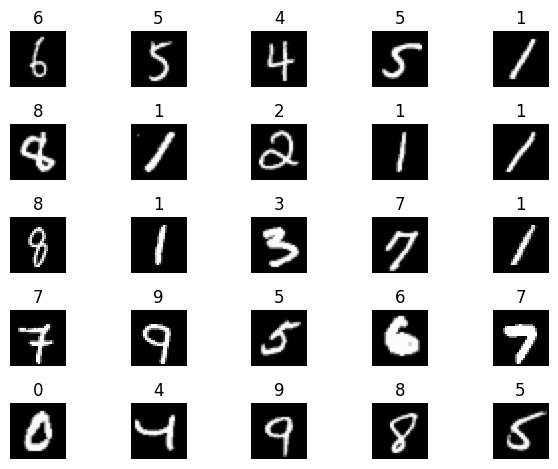

In [2]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
    ax = plt.subplot(5, 5, ix + 1)
    i = random.randint(0, len(X_train)-1)
    img, label = X_train[i], y_train[i]
    ax.imshow(img.reshape(28,28), cmap='gray')
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()

- Crearemos un clasificador binario sencillo que detecte el número 7

In [3]:
import numpy as np

X_train_7 = X_train[y_train == '7'][:100]
X_train_no_7 = X_train[y_train != '7'][:100]

len(X_train_7), len(X_train_no_7)

(100, 100)

In [4]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X)-1)
        img = X[i]
        ax.imshow(img.reshape(28,28), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

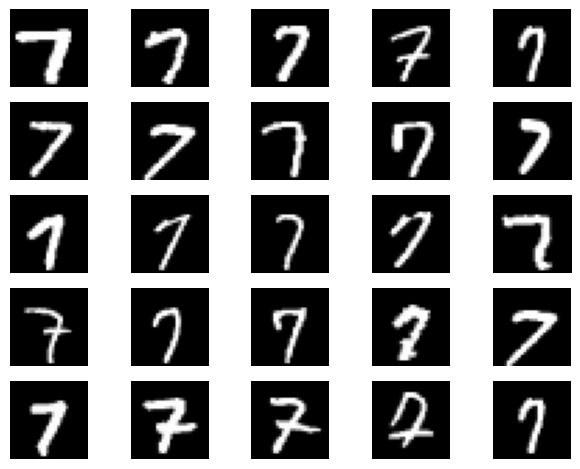

In [5]:
plot_samples(X_train_7)

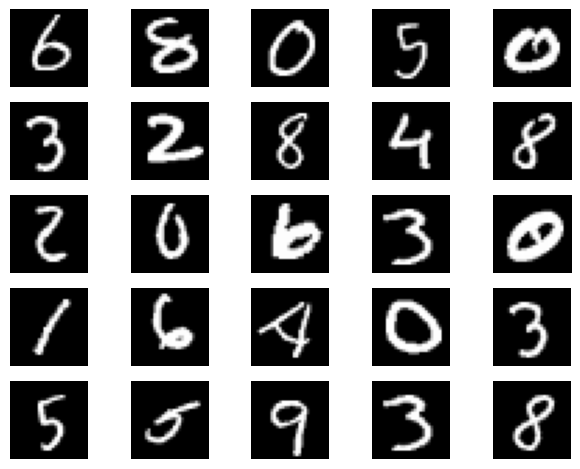

In [6]:
plot_samples(X_train_no_7)

*Ahora guardaremos las imágenes en sendas carpetas, separando además un 20% de las muestras para el conjunto de test. A medida que nuestra aplicación vaya creciendo y siendo usada cada vez más deberemos identificar aquellos ejemplos en los que falla, etiquetarlo e incluirlos en el conjunto de test. Por otro lado, deberemos recoger ejemplos similares, etiquetarlos y añadirlos al conjunto de entrenamiento. De este manera, al re-entrenar los modelos, nos aseguraremos de ir corrigiendo errores de manera adecuada (este proceso se conoce como active learning).*

In [8]:
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_7, X_train_no_7, test_size):
    shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

    splits = ['train', 'test']
    for split in splits:
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / '7', exist_ok=True)
        os.makedirs(path / split / 'no7', exist_ok=True)
        if split == 'train':
            X1, X2 = X_train_7[:-test_size], X_train_no_7[:-test_size]
        else:
            X1, X2 = X_train_7[-test_size:], X_train_no_7[-test_size:]
        for x1, x2 in zip(X1, X2):
            imsave(path / split / '7' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
            imsave(path / split / 'no7' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))

In [9]:
generate_dataset(X_train_7, X_train_no_7, 20)

In [10]:
from glob import glob

def get_paths():
    train_7 = glob(str(path / 'train' / '7' / '*.png'))
    train_no7 = glob(str(path / 'train' / 'no7' / '*.png'))
    test_7 = glob(str(path / 'test' / '7' / '*.png'))
    test_no7 = glob(str(path / 'test' / 'no7' / '*.png'))
    return train_7, train_no7, test_7, test_no7

train_7, train_no7, test_7, test_no7 = get_paths()

len(train_7), len(train_no7), len(test_7), len(test_no7)

(80, 80, 20, 20)

In [11]:
from skimage.io import imread

def plot_images(paths):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(paths)-1)
        img = imread(paths[i])
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

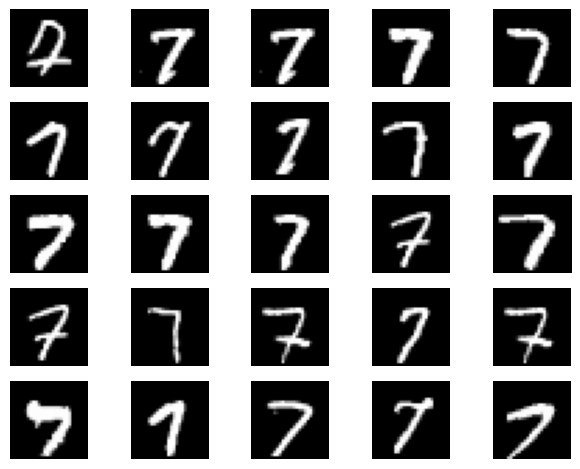

In [12]:
plot_images(train_7)

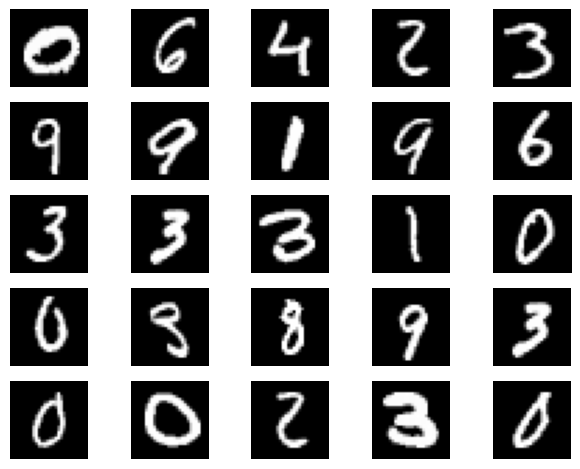

In [13]:
plot_images(train_no7)

## Creando nuevas versiones de datos

In [14]:
# Ahora vamos a generar una nueva versión del dataset con 100 muestras más de las que teníamos anteriormente.



X_train_7 = X_train[y_train == '7'][:200]
X_train_no_7 = X_train[y_train != '7'][:200]

len(X_train_7), len(X_train_no_7)

(200, 200)

In [15]:
generate_dataset(X_train_7, X_train_no_7, 40)

In [16]:
train_7, train_no7, test_7, test_no7 = get_paths()

len(train_7), len(train_no7), len(test_7), len(test_no7)

(160, 160, 40, 40)

Utilizaremos los comando vistos anteriormente para crear una nueva versión:

    dvc add dataset
    dvc push 
    git add .
    git commit -m 'nueva version'
    git push
    git tag -a v1 -m "version 1"
    git push origin --tags


Ahora que tenemos diferentes versiones podemos ir cambiando entre ellas de la siguiente manera.

    git checkout tags/v0
    dvc pull


In [17]:
train_7, train_no7, test_7, test_no7 = get_paths()

len(train_7), len(train_no7), len(test_7), len(test_no7)

(160, 160, 40, 40)